In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
# 1. Load full dataset
vocab_size = 10000
(X_raw, y_raw), _ = imdb.load_data(num_words=vocab_size)  # Ignore original test set

print("Total samples:", len(X_raw))

Total samples: 25000


In [17]:
# 2. Split 80% train, 20% test
x_train_raw, x_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

print("Training samples:", len(x_train_raw))
print("Testing samples:", len(x_test_raw))


Training samples: 20000
Testing samples: 5000


In [18]:

# 3. Pad sequences
max_len = 200
x_train = pad_sequences(x_train_raw, maxlen=max_len)
x_test = pad_sequences(x_test_raw, maxlen=max_len)

In [19]:
# 4. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [21]:
# 5. Train the model
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2  # 20% of training → validation
)

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6673 - loss: 0.5886 - val_accuracy: 0.8328 - val_loss: 0.3915
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8908 - loss: 0.2836 - val_accuracy: 0.8715 - val_loss: 0.3256
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9319 - loss: 0.1854 - val_accuracy: 0.8715 - val_loss: 0.3242


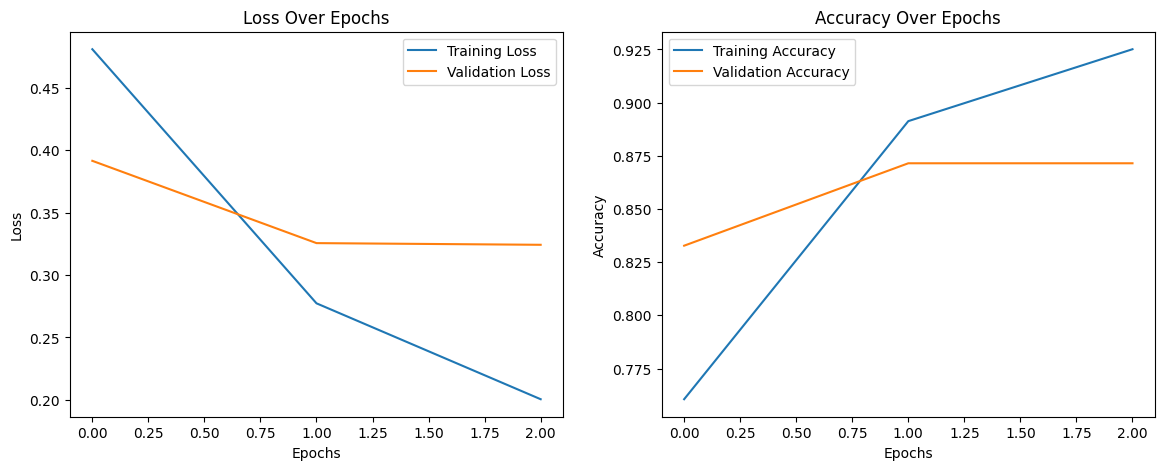

In [22]:
# 6. Plot Loss and Accuracy
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [23]:
# 7. Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8654 - loss: 0.3485

Test Accuracy: 0.8670


In [24]:
from sklearn.metrics import classification_report, accuracy_score


# Use padded sequences, same as training
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.867
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2437
           1       0.89      0.85      0.87      2563

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

